In [4]:
from _tests import scripts
from scripts.notebook_utils import *
import shutil
from tqdm import tqdm
import pandas as pd

## Eyeriss architecture

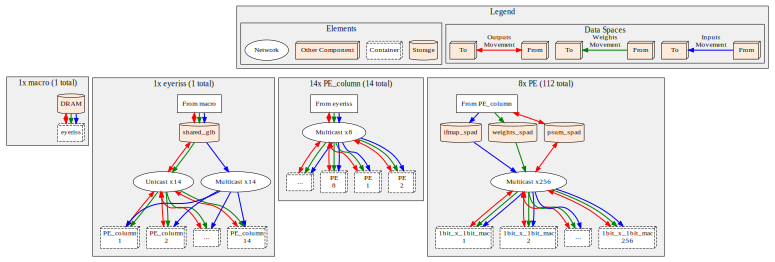

In [5]:
display_markdown("## Eyeriss architecture")
shutil.copyfile("arch_bs.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

In [140]:
archs = ["w0", "w3", "w3s", "w4"]
result = {}
for arch in archs:
    result = run_test("nestquant", "test_area_energy_breakdown", True, arch=arch, layer="workloads/llm/gemm.yaml")


   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml


## Quantizer after scratchpad

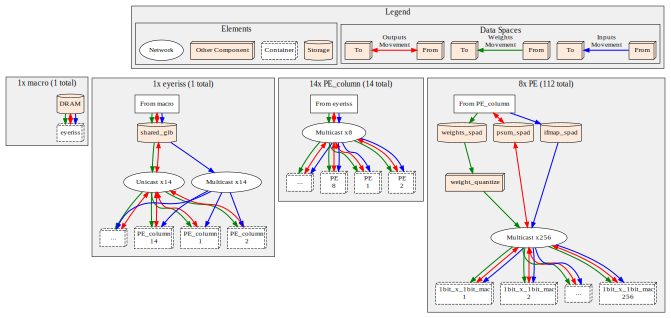

In [141]:
display_markdown("## Quantizer after scratchpad")
shutil.copyfile("arch_w0.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

## Quantizer before PEs

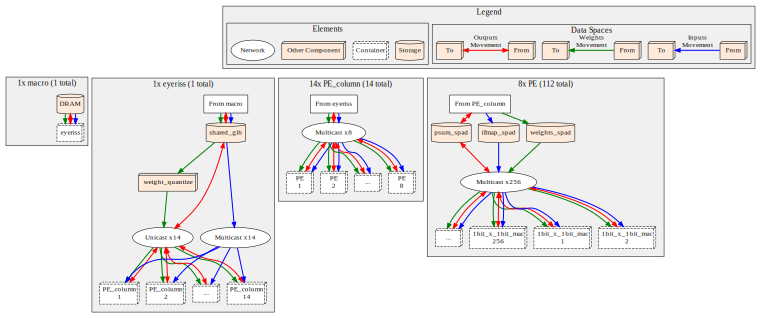

In [142]:
display_markdown("## Quantizer before PEs")
shutil.copyfile("arch_w3.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

## Quantizer before PEs with split buffer

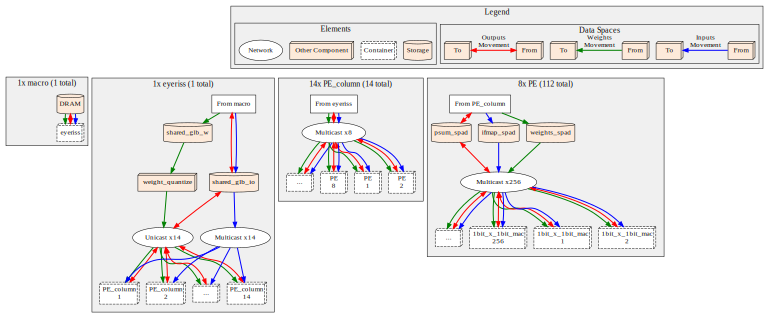

In [143]:
display_markdown("## Quantizer before PEs with split buffer")
shutil.copyfile("arch_w3s.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

## Quantizer before buffer

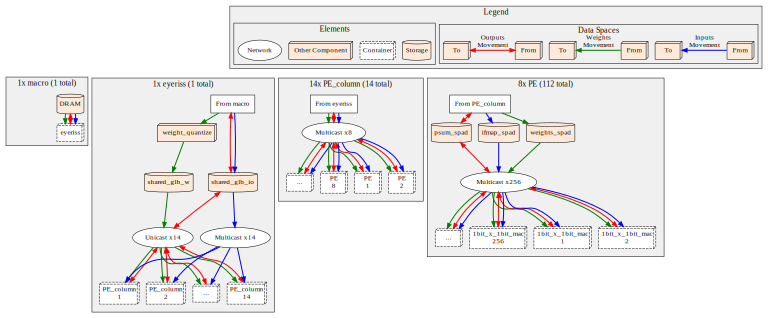

In [144]:
display_markdown("## Quantizer before buffer")
shutil.copyfile("arch_w4.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

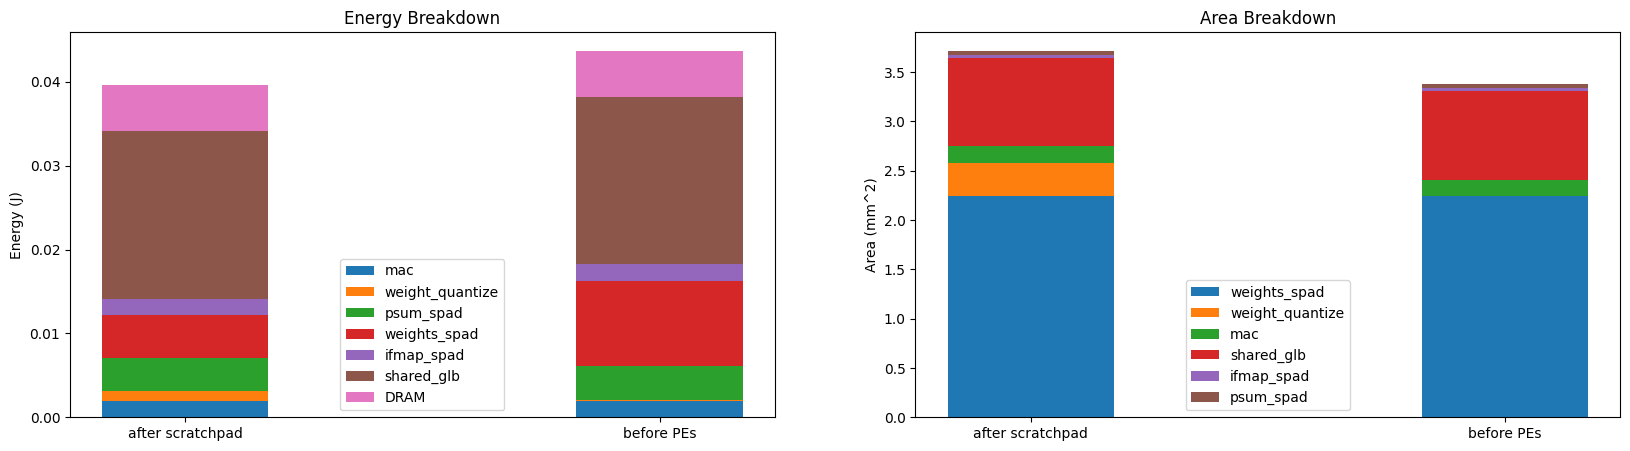

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {"after scratchpad": result["w0"].per_component_energy,
     "before PEs": result["w3"].per_component_energy},
    ylabel="Energy (J)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {"after scratchpad": result["w0"].per_component_area * 1e6,
     "before PEs": result["w3"].per_component_area * 1e6},
    ylabel="Area (mm^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)
for ax in axs:
    ax.tick_params(axis='x', labelrotation=0)
plt.savefig("figures/w03.pdf")

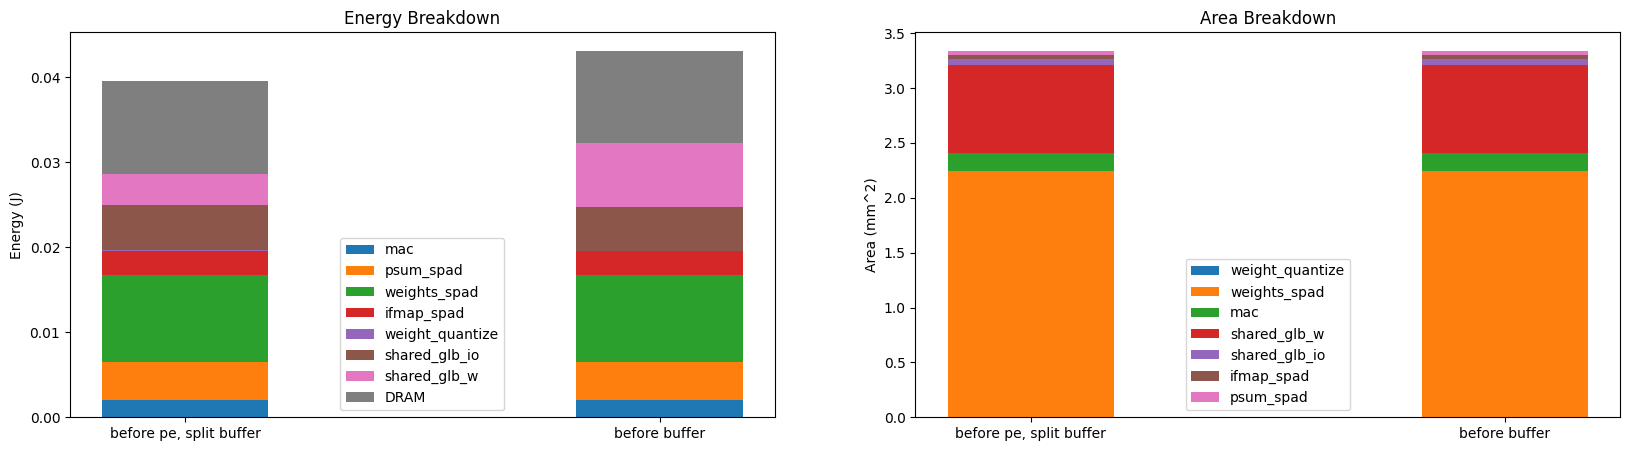

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {"before pe, split buffer": result["w3s"].per_component_energy,
     "before buffer": result["w4"].per_component_energy},
    ylabel="Energy (J)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {"before pe, split buffer": result["w3s"].per_component_area * 1e6,
     "before buffer": result["w4"].per_component_area * 1e6},
    ylabel="Area (mm^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)
for ax in axs:
    ax.tick_params(axis='x', labelrotation=0)
plt.savefig("figures/w34.pdf")

In [105]:
# Run tests for all configurations with GEMM workload
archs = ["w0", "w3", "w3s", "w4"]
gemm_results = {}
for arch in archs:
    gemm_results[arch] = run_test("nestquant", "test_area_energy_breakdown", 
                                arch=arch, layer="workloads/llm/gemm.yaml", use_dnn=False)




   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml


TypeError: scripts.utils.get_spec() got multiple values for keyword argument 'system'

In [109]:
gemm_results['w0'].per_component_area

{'weights_spad': 2.24e-06,
 'weight_quantize': 3.38128e-07,
 'mac': 1.6800014336e-07,
 'shared_glb': 8.9678e-07,
 'ifmap_spad': 3.3981248e-08,
 'psum_spad': 4.1683264e-08}

In [111]:
# Run tests for all configurations with DNN workload
dnn_results = {}
for arch in archs:
    dnn_results[arch] = run_test("nestquant", "test_area_energy_breakdown", 
                               arch=arch, layer="workloads/resnet18/00.yaml",)


   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/00.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/00.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/00.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/00.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml


In [112]:
# Create function to format results into a table
def create_table(gemm_results, dnn_results):
    all_data = []
    
    # Process GEMM results
    for config, result in gemm_results.items():
        row = {'Workload': 'GEMM', 'Config': config}
        
        # Get components from area and energy results
        components = sorted(set(list(result.per_component_area.keys()) + 
                               list(result.per_component_energy.keys())))
        
        # Calculate totals
        total_area = result.area
        total_energy = result.energy
        
        # Add data for each component
        for component in components:
            area = result.per_component_area.get(component, 0)
            energy = result.per_component_energy.get(component, 0)
            
            area_pct = (area / total_area * 100) if total_area > 0 else 0
            energy_pct = (energy / total_energy * 100) if total_energy > 0 else 0
            
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
        
        # Add totals
        row["Total (area)"] = f"{total_area:.2e} (100.00%)"
        row["Total (energy)"] = f"{total_energy:.2e} (100.00%)"
        
        all_data.append(row)
    
    # Process DNN results similarly
    for config, result in dnn_results.items():
        row = {'Workload': 'DNN', 'Config': config}
        
        components = sorted(set(list(result.per_component_area.keys()) + 
                               list(result.per_component_energy.keys())))
        
        total_area = result.area
        total_energy = result.energy
        
        for component in components:
            area = result.per_component_area.get(component, 0)
            energy = result.per_component_energy.get(component, 0)
            
            area_pct = (area / total_area * 100) if total_area > 0 else 0
            energy_pct = (energy / total_energy * 100) if total_energy > 0 else 0
            
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
        
        row["Total (area)"] = f"{total_area:.2e} (100.00%)"
        row["Total (energy)"] = f"{total_energy:.2e} (100.00%)"
        
        all_data.append(row)
    
    # Create DataFrame from the collected data
    df = pd.DataFrame(all_data)
    
    # Get all unique components across all results
    all_components = set()
    for row in all_data:
        for key in row.keys():
            if '(' in key and key not in ['Workload', 'Config', 'Total (area)', 'Total (energy)']:
                component = key.split(' (')[0]
                all_components.add(component)
    
    # Create ordered column list
    columns = ['Workload', 'Config']
    for component in sorted(list(all_components)):
        columns.extend([f"{component} (area)", f"{component} (energy)"])
    columns.extend(["Total (area)", "Total (energy)"])
    
    # Return the properly ordered DataFrame
    return df[columns]

# Display the table
table = create_table(gemm_results, dnn_results)
display(table)  # In notebook
# Or use print(table) if not in a notebook

,Workload,Config,DRAM (area),DRAM (energy),ifmap_spad (area),ifmap_spad (energy),mac (area),mac (energy),psum_spad (area),psum_spad (energy),...,shared_glb_io (area),shared_glb_io (energy),shared_glb_w (area),shared_glb_w (energy),weight_quantize (area),weight_quantize (energy),weights_spad (area),weights_spad (energy),Total (area),Total (energy)
0,GEMM,w0,0.00e+00 (0.00%),5.50e-03 (13.89%),3.40e-08 (0.91%),1.97e-03 (4.97%),1.68e-07 (4.52%),1.97e-03 (4.99%),4.17e-08 (1.12%),3.98e-03 (10.05%),...,NaN,NaN,NaN,NaN,3.38e-07 (9.09%),1.10e-03 (2.78%),2.24e-06 (60.24%),5.10e-03 (12.89%),3.72e-06 (100.00%),3.96e-02 (100.00%)
1,GEMM,w3,0.00e+00 (0.00%),5.50e-03 (12.57%),3.40e-08 (1.00%),1.97e-03 (4.50%),1.68e-07 (4.97%),1.97e-03 (4.52%),4.17e-08 (1.23%),3.98e-03 (9.10%),...,NaN,NaN,NaN,NaN,3.02e-09 (0.09%),1.38e-04 (0.31%),2.24e-06 (66.20%),1.02e-02 (23.33%),3.38e-06 (100.00%),4.37e-02 (100.00%)
2,GEMM,w3s,0.00e+00 (0.00%),1.09e-02 (27.49%),3.40e-08 (1.02%),2.81e-03 (7.12%),1.68e-07 (5.03%),1.97e-03 (5.00%),4.17e-08 (1.25%),4.51e-03 (11.41%),...,5.51e-08 (1.65%),5.28e-03 (13.36%),7.99e-07 (23.92%),3.74e-03 (9.46%),3.02e-09 (0.09%),1.38e-04 (0.35%),2.24e-06 (67.04%),1.02e-02 (25.82%),3.34e-06 (100.00%),3.95e-02 (100.00%)
3,GEMM,w4,0.00e+00 (0.00%),1.09e-02 (25.19%),3.40e-08 (1.02%),2.81e-03 (6.53%),1.68e-07 (5.03%),1.97e-03 (4.58%),4.17e-08 (1.25%),4.51e-03 (10.45%),...,5.51e-08 (1.65%),5.28e-03 (12.24%),7.99e-07 (23.92%),7.48e-03 (17.34%),3.02e-09 (0.09%),5.37e-07 (0.00%),2.24e-06 (67.04%),1.02e-02 (23.66%),3.34e-06 (100.00%),4.31e-02 (100.00%)
4,DNN,w0,0.00e+00 (0.00%),1.06e-04 (12.24%),3.40e-08 (0.91%),2.11e-05 (2.44%),1.68e-07 (4.52%),2.71e-05 (3.14%),4.17e-08 (1.12%),7.64e-05 (8.85%),...,NaN,NaN,NaN,NaN,3.38e-07 (9.09%),1.51e-05 (1.75%),2.24e-06 (60.24%),5.95e-05 (6.89%),3.72e-06 (100.00%),8.64e-04 (100.00%)
5,DNN,w3,0.00e+00 (0.00%),1.06e-04 (11.64%),3.40e-08 (1.00%),2.11e-05 (2.33%),1.68e-07 (4.97%),2.71e-05 (2.99%),4.17e-08 (1.23%),7.64e-05 (8.42%),...,NaN,NaN,NaN,NaN,3.02e-09 (0.09%),6.74e-08 (0.01%),2.24e-06 (66.20%),1.19e-04 (13.07%),3.38e-06 (100.00%),9.08e-04 (100.00%)
6,DNN,w3s,0.00e+00 (0.00%),1.27e-04 (23.90%),3.40e-08 (1.02%),3.87e-05 (7.25%),1.68e-07 (5.03%),2.71e-05 (5.09%),4.17e-08 (1.25%),7.64e-05 (14.33%),...,5.51e-08 (1.65%),1.40e-04 (26.28%),7.99e-07 (23.92%),3.75e-06 (0.70%),3.02e-09 (0.09%),1.35e-07 (0.03%),2.24e-06 (67.04%),1.20e-04 (22.43%),3.34e-06 (100.00%),5.33e-04 (100.00%)
7,DNN,w4,0.00e+00 (0.00%),1.27e-04 (23.74%),3.40e-08 (1.02%),3.87e-05 (7.20%),1.68e-07 (5.03%),2.71e-05 (5.05%),4.17e-08 (1.25%),7.64e-05 (14.23%),...,5.51e-08 (1.65%),1.40e-04 (26.10%),7.99e-07 (23.92%),7.46e-06 (1.39%),3.02e-09 (0.09%),2.41e-09 (0.00%),2.24e-06 (67.04%),1.20e-04 (22.28%),3.34e-06 (100.00%),5.37e-04 (100.00%)


In [113]:
# Style the table for better visualization
styled_table = table.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid gray',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f9f9f9')]}
])

# Display the styled table
display(styled_table)

,Workload,Config,DRAM (area),DRAM (energy),ifmap_spad (area),ifmap_spad (energy),mac (area),mac (energy),psum_spad (area),psum_spad (energy),shared_glb (area),shared_glb (energy),shared_glb_io (area),shared_glb_io (energy),shared_glb_w (area),shared_glb_w (energy),weight_quantize (area),weight_quantize (energy),weights_spad (area),weights_spad (energy),Total (area),Total (energy)
0,GEMM,w0,0.00e+00 (0.00%),5.50e-03 (13.89%),3.40e-08 (0.91%),1.97e-03 (4.97%),1.68e-07 (4.52%),1.97e-03 (4.99%),4.17e-08 (1.12%),3.98e-03 (10.05%),8.97e-07 (24.12%),2.00e-02 (50.44%),nan,nan,nan,nan,3.38e-07 (9.09%),1.10e-03 (2.78%),2.24e-06 (60.24%),5.10e-03 (12.89%),3.72e-06 (100.00%),3.96e-02 (100.00%)
1,GEMM,w3,0.00e+00 (0.00%),5.50e-03 (12.57%),3.40e-08 (1.00%),1.97e-03 (4.50%),1.68e-07 (4.97%),1.97e-03 (4.52%),4.17e-08 (1.23%),3.98e-03 (9.10%),8.97e-07 (26.50%),2.00e-02 (45.66%),nan,nan,nan,nan,3.02e-09 (0.09%),1.38e-04 (0.31%),2.24e-06 (66.20%),1.02e-02 (23.33%),3.38e-06 (100.00%),4.37e-02 (100.00%)
2,GEMM,w3s,0.00e+00 (0.00%),1.09e-02 (27.49%),3.40e-08 (1.02%),2.81e-03 (7.12%),1.68e-07 (5.03%),1.97e-03 (5.00%),4.17e-08 (1.25%),4.51e-03 (11.41%),nan,nan,5.51e-08 (1.65%),5.28e-03 (13.36%),7.99e-07 (23.92%),3.74e-03 (9.46%),3.02e-09 (0.09%),1.38e-04 (0.35%),2.24e-06 (67.04%),1.02e-02 (25.82%),3.34e-06 (100.00%),3.95e-02 (100.00%)
3,GEMM,w4,0.00e+00 (0.00%),1.09e-02 (25.19%),3.40e-08 (1.02%),2.81e-03 (6.53%),1.68e-07 (5.03%),1.97e-03 (4.58%),4.17e-08 (1.25%),4.51e-03 (10.45%),nan,nan,5.51e-08 (1.65%),5.28e-03 (12.24%),7.99e-07 (23.92%),7.48e-03 (17.34%),3.02e-09 (0.09%),5.37e-07 (0.00%),2.24e-06 (67.04%),1.02e-02 (23.66%),3.34e-06 (100.00%),4.31e-02 (100.00%)
4,DNN,w0,0.00e+00 (0.00%),1.06e-04 (12.24%),3.40e-08 (0.91%),2.11e-05 (2.44%),1.68e-07 (4.52%),2.71e-05 (3.14%),4.17e-08 (1.12%),7.64e-05 (8.85%),8.97e-07 (24.12%),5.59e-04 (64.69%),nan,nan,nan,nan,3.38e-07 (9.09%),1.51e-05 (1.75%),2.24e-06 (60.24%),5.95e-05 (6.89%),3.72e-06 (100.00%),8.64e-04 (100.00%)
5,DNN,w3,0.00e+00 (0.00%),1.06e-04 (11.64%),3.40e-08 (1.00%),2.11e-05 (2.33%),1.68e-07 (4.97%),2.71e-05 (2.99%),4.17e-08 (1.23%),7.64e-05 (8.42%),8.97e-07 (26.50%),5.59e-04 (61.55%),nan,nan,nan,nan,3.02e-09 (0.09%),6.74e-08 (0.01%),2.24e-06 (66.20%),1.19e-04 (13.07%),3.38e-06 (100.00%),9.08e-04 (100.00%)
6,DNN,w3s,0.00e+00 (0.00%),1.27e-04 (23.90%),3.40e-08 (1.02%),3.87e-05 (7.25%),1.68e-07 (5.03%),2.71e-05 (5.09%),4.17e-08 (1.25%),7.64e-05 (14.33%),nan,nan,5.51e-08 (1.65%),1.40e-04 (26.28%),7.99e-07 (23.92%),3.75e-06 (0.70%),3.02e-09 (0.09%),1.35e-07 (0.03%),2.24e-06 (67.04%),1.20e-04 (22.43%),3.34e-06 (100.00%),5.33e-04 (100.00%)
7,DNN,w4,0.00e+00 (0.00%),1.27e-04 (23.74%),3.40e-08 (1.02%),3.87e-05 (7.20%),1.68e-07 (5.03%),2.71e-05 (5.05%),4.17e-08 (1.25%),7.64e-05 (14.23%),nan,nan,5.51e-08 (1.65%),1.40e-04 (26.10%),7.99e-07 (23.92%),7.46e-06 (1.39%),3.02e-09 (0.09%),2.41e-09 (0.00%),2.24e-06 (67.04%),1.20e-04 (22.28%),3.34e-06 (100.00%),5.37e-04 (100.00%)


In [114]:
# Run tests for all configurations with GEMM workload
archs = ["w0", "w3", "w3s", "w4"]
gemv_results = {}
for arch in archs:
    gemv_results[arch] = run_test("nestquant", "test_area_energy_breakdown", 
                                arch=arch, layer="workloads/llm/gemv.yaml", use_dnn=False)

dnn2_results = {}
for arch in archs:
    dnn2_results[arch] = run_test("nestquant", "test_area_energy_breakdown", 
                               arch=arch, layer="workloads/resnet18/13.yaml",)




   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemv.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemv.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemv.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/llm/gemv.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/13.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/13.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/13.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18/13.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml


In [124]:
# Create function to format results into a table
def create_table2(gemv_results, dnn2_results):
    all_data = []
    
    # Process GEMM results
    for config, result in gemv_results.items():
        row = {'Workload': 'GEMM', 'Config': config}
        
        # Get components from area and energy results
        components = sorted(set(list(result.per_component_area.keys()) + 
                               list(result.per_component_energy.keys())))
        
        # Calculate totals
        total_area = result.area
        total_energy = result.energy
        
        # Add data for each component
        for component in components:
            area = result.per_component_area.get(component, 0)
            energy = result.per_component_energy.get(component, 0)
            
            area_pct = (area / total_area * 100) if total_area > 0 else 0
            energy_pct = (energy / total_energy * 100) if total_energy > 0 else 0
            
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
        
        # Add totals
        row["Total (area)"] = f"{total_area:.2e} (100.00%)"
        row["Total (energy)"] = f"{total_energy:.2e} (100.00%)"
        
        all_data.append(row)
    
    # Process DNN results similarly
    for config, result in dnn2_results.items():
        row = {'Workload': 'DNN', 'Config': config}
        
        components = sorted(set(list(result.per_component_area.keys()) + 
                               list(result.per_component_energy.keys())))
        
        total_area = result.area
        total_energy = result.energy
        
        for component in components:
            area = result.per_component_area.get(component, 0)
            energy = result.per_component_energy.get(component, 0)
            
            area_pct = (area / total_area * 100) if total_area > 0 else 0
            energy_pct = (energy / total_energy * 100) if total_energy > 0 else 0
            
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
        
        row["Total (area)"] = f"{total_area:.2e} (100.00%)"
        row["Total (energy)"] = f"{total_energy:.2e} (100.00%)"
        
        all_data.append(row)
    
    # Create DataFrame from the collected data
    df = pd.DataFrame(all_data)
    
    # Get all unique components across all results
    all_components = set()
    for row in all_data:
        for key in row.keys():
            if '(' in key and key not in ['Workload', 'Config', 'Total (area)', 'Total (energy)']:
                component = key.split(' (')[0]
                all_components.add(component)
    
    # Create ordered column list
    columns = ['Workload', 'Config']
    for component in sorted(list(all_components)):
        columns.extend([f"{component} (area)", f"{component} (energy)"])
    columns.extend(["Total (area)", "Total (energy)"])
    
    # Return the properly ordered DataFrame
    return df[columns]

# Display the table
table2 = create_table2(gemv_results, dnn2_results)
display(table2)  # In notebook
# Or use print(table) if not in a notebook

,Workload,Config,DRAM (area),DRAM (energy),ifmap_spad (area),ifmap_spad (energy),mac (area),mac (energy),psum_spad (area),psum_spad (energy),...,shared_glb_io (area),shared_glb_io (energy),shared_glb_w (area),shared_glb_w (energy),weight_quantize (area),weight_quantize (energy),weights_spad (area),weights_spad (energy),Total (area),Total (energy)
0,GEMM,w0,0.00e+00 (0.00%),1.34e-04 (77.67%),3.40e-08 (0.91%),9.60e-07 (0.56%),1.68e-07 (4.52%),9.64e-07 (0.56%),4.17e-08 (1.12%),1.69e-06 (0.98%),...,NaN,NaN,NaN,NaN,3.38e-07 (9.09%),5.37e-07 (0.31%),2.24e-06 (60.24%),5.24e-06 (3.03%),3.72e-06 (100.00%),1.73e-04 (100.00%)
1,GEMM,w3,0.00e+00 (0.00%),1.34e-04 (75.38%),3.40e-08 (1.00%),9.60e-07 (0.54%),1.68e-07 (4.97%),9.64e-07 (0.54%),4.17e-08 (1.23%),1.69e-06 (0.95%),...,NaN,NaN,NaN,NaN,3.02e-09 (0.09%),5.37e-07 (0.30%),2.24e-06 (66.20%),1.05e-05 (5.89%),3.38e-06 (100.00%),1.78e-04 (100.00%)
2,GEMM,w3s,0.00e+00 (0.00%),1.68e-04 (78.88%),3.40e-08 (1.02%),7.51e-07 (0.35%),1.68e-07 (5.03%),9.64e-07 (0.45%),4.17e-08 (1.25%),2.72e-06 (1.28%),...,5.51e-08 (1.65%),2.56e-06 (1.20%),7.99e-07 (23.92%),2.68e-05 (12.64%),3.02e-09 (0.09%),5.37e-07 (0.25%),2.24e-06 (67.04%),1.05e-05 (4.94%),3.34e-06 (100.00%),2.12e-04 (100.00%)
3,GEMM,w4,0.00e+00 (0.00%),1.68e-04 (70.06%),3.40e-08 (1.02%),7.51e-07 (0.31%),1.68e-07 (5.03%),9.64e-07 (0.40%),4.17e-08 (1.25%),2.72e-06 (1.14%),...,5.51e-08 (1.65%),2.56e-06 (1.07%),7.99e-07 (23.92%),5.36e-05 (22.41%),3.02e-09 (0.09%),5.37e-07 (0.22%),2.24e-06 (67.04%),1.05e-05 (4.39%),3.34e-06 (100.00%),2.39e-04 (100.00%)
4,DNN,w0,0.00e+00 (0.00%),4.91e-05 (7.04%),3.40e-08 (0.91%),3.02e-05 (4.32%),1.68e-07 (4.52%),2.66e-05 (3.81%),4.17e-08 (1.12%),5.00e-05 (7.16%),...,NaN,NaN,NaN,NaN,3.38e-07 (9.09%),1.48e-05 (2.12%),2.24e-06 (60.24%),1.01e-04 (14.50%),3.72e-06 (100.00%),6.98e-04 (100.00%)
5,DNN,w3,0.00e+00 (0.00%),4.91e-05 (6.20%),3.40e-08 (1.00%),3.02e-05 (3.81%),1.68e-07 (4.97%),2.66e-05 (3.36%),4.17e-08 (1.23%),5.00e-05 (6.32%),...,NaN,NaN,NaN,NaN,3.02e-09 (0.09%),7.40e-06 (0.93%),2.24e-06 (66.20%),2.02e-04 (25.56%),3.38e-06 (100.00%),7.92e-04 (100.00%)
6,DNN,w3s,0.00e+00 (0.00%),1.32e-04 (22.74%),3.40e-08 (1.02%),3.79e-05 (6.51%),1.68e-07 (5.03%),2.66e-05 (4.57%),4.17e-08 (1.25%),6.07e-05 (10.43%),...,5.51e-08 (1.65%),1.95e-04 (33.48%),7.99e-07 (23.92%),9.97e-06 (1.71%),3.02e-09 (0.09%),3.02e-07 (0.05%),2.24e-06 (67.04%),1.19e-04 (20.50%),3.34e-06 (100.00%),5.82e-04 (100.00%)
7,DNN,w4,0.00e+00 (0.00%),1.02e-04 (22.73%),3.40e-08 (1.02%),3.79e-05 (8.48%),1.68e-07 (5.03%),2.66e-05 (5.95%),4.17e-08 (1.25%),6.07e-05 (13.58%),...,5.51e-08 (1.65%),6.57e-05 (14.71%),7.99e-07 (23.92%),3.23e-05 (7.22%),3.02e-09 (0.09%),7.55e-08 (0.02%),2.24e-06 (67.04%),1.22e-04 (27.30%),3.34e-06 (100.00%),4.47e-04 (100.00%)


In [125]:
styled_table2 = table2.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid gray',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f9f9f9')]}
])

# Display the styled table
display(styled_table2)

,Workload,Config,DRAM (area),DRAM (energy),ifmap_spad (area),ifmap_spad (energy),mac (area),mac (energy),psum_spad (area),psum_spad (energy),shared_glb (area),shared_glb (energy),shared_glb_io (area),shared_glb_io (energy),shared_glb_w (area),shared_glb_w (energy),weight_quantize (area),weight_quantize (energy),weights_spad (area),weights_spad (energy),Total (area),Total (energy)
0,GEMM,w0,0.00e+00 (0.00%),1.34e-04 (77.67%),3.40e-08 (0.91%),9.60e-07 (0.56%),1.68e-07 (4.52%),9.64e-07 (0.56%),4.17e-08 (1.12%),1.69e-06 (0.98%),8.97e-07 (24.12%),2.92e-05 (16.90%),nan,nan,nan,nan,3.38e-07 (9.09%),5.37e-07 (0.31%),2.24e-06 (60.24%),5.24e-06 (3.03%),3.72e-06 (100.00%),1.73e-04 (100.00%)
1,GEMM,w3,0.00e+00 (0.00%),1.34e-04 (75.38%),3.40e-08 (1.00%),9.60e-07 (0.54%),1.68e-07 (4.97%),9.64e-07 (0.54%),4.17e-08 (1.23%),1.69e-06 (0.95%),8.97e-07 (26.50%),2.92e-05 (16.40%),nan,nan,nan,nan,3.02e-09 (0.09%),5.37e-07 (0.30%),2.24e-06 (66.20%),1.05e-05 (5.89%),3.38e-06 (100.00%),1.78e-04 (100.00%)
2,GEMM,w3s,0.00e+00 (0.00%),1.68e-04 (78.88%),3.40e-08 (1.02%),7.51e-07 (0.35%),1.68e-07 (5.03%),9.64e-07 (0.45%),4.17e-08 (1.25%),2.72e-06 (1.28%),nan,nan,5.51e-08 (1.65%),2.56e-06 (1.20%),7.99e-07 (23.92%),2.68e-05 (12.64%),3.02e-09 (0.09%),5.37e-07 (0.25%),2.24e-06 (67.04%),1.05e-05 (4.94%),3.34e-06 (100.00%),2.12e-04 (100.00%)
3,GEMM,w4,0.00e+00 (0.00%),1.68e-04 (70.06%),3.40e-08 (1.02%),7.51e-07 (0.31%),1.68e-07 (5.03%),9.64e-07 (0.40%),4.17e-08 (1.25%),2.72e-06 (1.14%),nan,nan,5.51e-08 (1.65%),2.56e-06 (1.07%),7.99e-07 (23.92%),5.36e-05 (22.41%),3.02e-09 (0.09%),5.37e-07 (0.22%),2.24e-06 (67.04%),1.05e-05 (4.39%),3.34e-06 (100.00%),2.39e-04 (100.00%)
4,DNN,w0,0.00e+00 (0.00%),4.91e-05 (7.04%),3.40e-08 (0.91%),3.02e-05 (4.32%),1.68e-07 (4.52%),2.66e-05 (3.81%),4.17e-08 (1.12%),5.00e-05 (7.16%),8.97e-07 (24.12%),4.26e-04 (61.05%),nan,nan,nan,nan,3.38e-07 (9.09%),1.48e-05 (2.12%),2.24e-06 (60.24%),1.01e-04 (14.50%),3.72e-06 (100.00%),6.98e-04 (100.00%)
5,DNN,w3,0.00e+00 (0.00%),4.91e-05 (6.20%),3.40e-08 (1.00%),3.02e-05 (3.81%),1.68e-07 (4.97%),2.66e-05 (3.36%),4.17e-08 (1.23%),5.00e-05 (6.32%),8.97e-07 (26.50%),4.26e-04 (53.82%),nan,nan,nan,nan,3.02e-09 (0.09%),7.40e-06 (0.93%),2.24e-06 (66.20%),2.02e-04 (25.56%),3.38e-06 (100.00%),7.92e-04 (100.00%)
6,DNN,w3s,0.00e+00 (0.00%),1.32e-04 (22.74%),3.40e-08 (1.02%),3.79e-05 (6.51%),1.68e-07 (5.03%),2.66e-05 (4.57%),4.17e-08 (1.25%),6.07e-05 (10.43%),nan,nan,5.51e-08 (1.65%),1.95e-04 (33.48%),7.99e-07 (23.92%),9.97e-06 (1.71%),3.02e-09 (0.09%),3.02e-07 (0.05%),2.24e-06 (67.04%),1.19e-04 (20.50%),3.34e-06 (100.00%),5.82e-04 (100.00%)
7,DNN,w4,0.00e+00 (0.00%),1.02e-04 (22.73%),3.40e-08 (1.02%),3.79e-05 (8.48%),1.68e-07 (5.03%),2.66e-05 (5.95%),4.17e-08 (1.25%),6.07e-05 (13.58%),nan,nan,5.51e-08 (1.65%),6.57e-05 (14.71%),7.99e-07 (23.92%),3.23e-05 (7.22%),3.02e-09 (0.09%),7.55e-08 (0.02%),2.24e-06 (67.04%),1.22e-04 (27.30%),3.34e-06 (100.00%),4.47e-04 (100.00%)


In [118]:
# First create and style your table
styled_table = table.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid gray',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f9f9f9')]}
])

# Method 1: Using matplotlib (most reliable)
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

# Create a figure with appropriate size
fig, ax = plt.subplots(figsize=(20, len(table) + 1))  # Adjust size as needed
ax.axis('off')

# Plot the styled table
table_plot = ax.table(
    cellText=table.values,
    colLabels=table.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Adjust font size and row heights
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(10)
table_plot.scale(1, 1.5)  # Adjust row heights

# Save as PNG
plt.savefig('nestquant_results_table.png', bbox_inches='tight', dpi=300)
plt.close()

In [122]:
# Create two separate tables - one for area, one for energy
area_columns = ['Workload', 'Config'] + [col for col in table.columns if 'area' in col]
energy_columns = ['Workload', 'Config'] + [col for col in table.columns if 'energy' in col]

# Create and save area table
fig1, ax1 = plt.subplots(figsize=(18, 8))
ax1.axis('off')
table1 = ax1.table(cellText=table[area_columns].values, colLabels=area_columns, 
                  cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table1.auto_set_font_size(False)
table1.set_fontsize(9)
table1.scale(1, 1.8)
plt.savefig('nestquant_area_table.png', bbox_inches='tight', dpi=300)
plt.close()

# Create and save energy table
fig2, ax2 = plt.subplots(figsize=(18, 8))
ax2.axis('off')
table2 = ax2.table(cellText=table[energy_columns].values, colLabels=energy_columns, 
                  cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table2.auto_set_font_size(False)
table2.set_fontsize(6)
table2.scale(1, 1.8)
plt.savefig('nestquant_energy_table.png', bbox_inches='tight', dpi=300)
plt.close()

In [127]:
full_dnn_results = {}
for arch in archs:
    full_dnn_results[arch] = run_test("nestquant", "test_area_energy_breakdown", 
                                arch=arch, 
                                layer="workloads/resnet18", 
                                use_dnn=True)


   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml



   Test area and energy breakdown for different nestquant architectures.
   
   Parameters:
   - arch: Architecture configuration (w0, w3, w3s, w4)
   - layer: Layer configuration file path
   - use_dnn: If True, uses utl.quick_run for DNN workload instead of utl.run_layer
   

Running on layer /home/workspace/models/workloads/resnet18
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml


,Workload,Config,DRAM (area),DRAM (energy),ifmap_spad (area),ifmap_spad (energy),mac (area),mac (energy),psum_spad (area),psum_spad (energy),...,shared_glb_io (area),shared_glb_io (energy),shared_glb_w (area),shared_glb_w (energy),weight_quantize (area),weight_quantize (energy),weights_spad (area),weights_spad (energy),Total (area),Total (energy)
0,GEMM,w0,N/A,5.50e-03 (13.89%),3.40e-08 (0.91%),1.97e-03 (4.97%),1.68e-07 (4.52%),1.97e-03 (4.99%),4.17e-08 (1.12%),3.98e-03 (10.05%),...,NaN,NaN,NaN,NaN,3.38e-07 (9.09%),1.10e-03 (2.78%),2.24e-06 (60.24%),5.10e-03 (12.89%),3.72e-06 (100.00%),3.96e-02 (100.00%)
1,GEMM,w3,N/A,5.50e-03 (12.57%),3.40e-08 (1.00%),1.97e-03 (4.50%),1.68e-07 (4.97%),1.97e-03 (4.52%),4.17e-08 (1.23%),3.98e-03 (9.10%),...,NaN,NaN,NaN,NaN,3.02e-09 (0.09%),1.38e-04 (0.31%),2.24e-06 (66.20%),1.02e-02 (23.33%),3.38e-06 (100.00%),4.37e-02 (100.00%)
2,GEMM,w3s,N/A,1.09e-02 (27.49%),3.40e-08 (1.02%),2.81e-03 (7.12%),1.68e-07 (5.03%),1.97e-03 (5.00%),4.17e-08 (1.25%),4.51e-03 (11.41%),...,5.51e-08 (1.65%),5.28e-03 (13.36%),7.99e-07 (23.92%),3.74e-03 (9.46%),3.02e-09 (0.09%),1.38e-04 (0.35%),2.24e-06 (67.04%),1.02e-02 (25.82%),3.34e-06 (100.00%),3.95e-02 (100.00%)
3,GEMM,w4,N/A,1.09e-02 (25.19%),3.40e-08 (1.02%),2.81e-03 (6.53%),1.68e-07 (5.03%),1.97e-03 (4.58%),4.17e-08 (1.25%),4.51e-03 (10.45%),...,5.51e-08 (1.65%),5.28e-03 (12.24%),7.99e-07 (23.92%),7.48e-03 (17.34%),3.02e-09 (0.09%),5.37e-07 (0.00%),2.24e-06 (67.04%),1.02e-02 (23.66%),3.34e-06 (100.00%),4.31e-02 (100.00%)
4,DNN,w0,N/A,6.14e-09 (76.85%),3.40e-08 (0.91%),3.67e-11 (0.46%),1.68e-07 (4.52%),2.57e-11 (0.32%),4.17e-08 (1.12%),6.08e-11 (0.76%),...,NaN,NaN,NaN,NaN,3.38e-07 (9.09%),1.64e-11 (0.21%),2.24e-06 (60.24%),1.60e-10 (2.00%),3.72e-06 (100.00%),7.98e-09 (100.00%)
5,DNN,w3,N/A,6.14e-09 (75.73%),3.40e-08 (1.00%),3.67e-11 (0.45%),1.68e-07 (4.97%),2.57e-11 (0.32%),4.17e-08 (1.23%),6.08e-11 (0.75%),...,NaN,NaN,NaN,NaN,3.02e-09 (0.09%),1.43e-11 (0.18%),2.24e-06 (66.20%),2.80e-10 (3.46%),3.38e-06 (100.00%),8.10e-09 (100.00%)
6,DNN,w3s,N/A,6.14e-09 (83.19%),3.40e-08 (1.02%),3.67e-11 (0.50%),1.68e-07 (5.03%),2.57e-11 (0.35%),4.17e-08 (1.25%),5.88e-11 (0.80%),...,5.51e-08 (1.65%),1.08e-10 (1.46%),7.99e-07 (23.92%),7.17e-10 (9.72%),3.02e-09 (0.09%),1.43e-11 (0.19%),2.24e-06 (67.04%),2.80e-10 (3.80%),3.34e-06 (100.00%),7.38e-09 (100.00%)
7,DNN,w4,N/A,6.14e-09 (75.85%),3.40e-08 (1.02%),3.67e-11 (0.45%),1.68e-07 (5.03%),2.57e-11 (0.32%),4.17e-08 (1.25%),5.88e-11 (0.73%),...,5.51e-08 (1.65%),1.08e-10 (1.33%),7.99e-07 (23.92%),1.43e-09 (17.69%),3.02e-09 (0.09%),1.43e-11 (0.18%),2.24e-06 (67.04%),2.80e-10 (3.46%),3.34e-06 (100.00%),8.09e-09 (100.00%)


AttributeError: 'Cell' object has no attribute 'set_text_rotation'

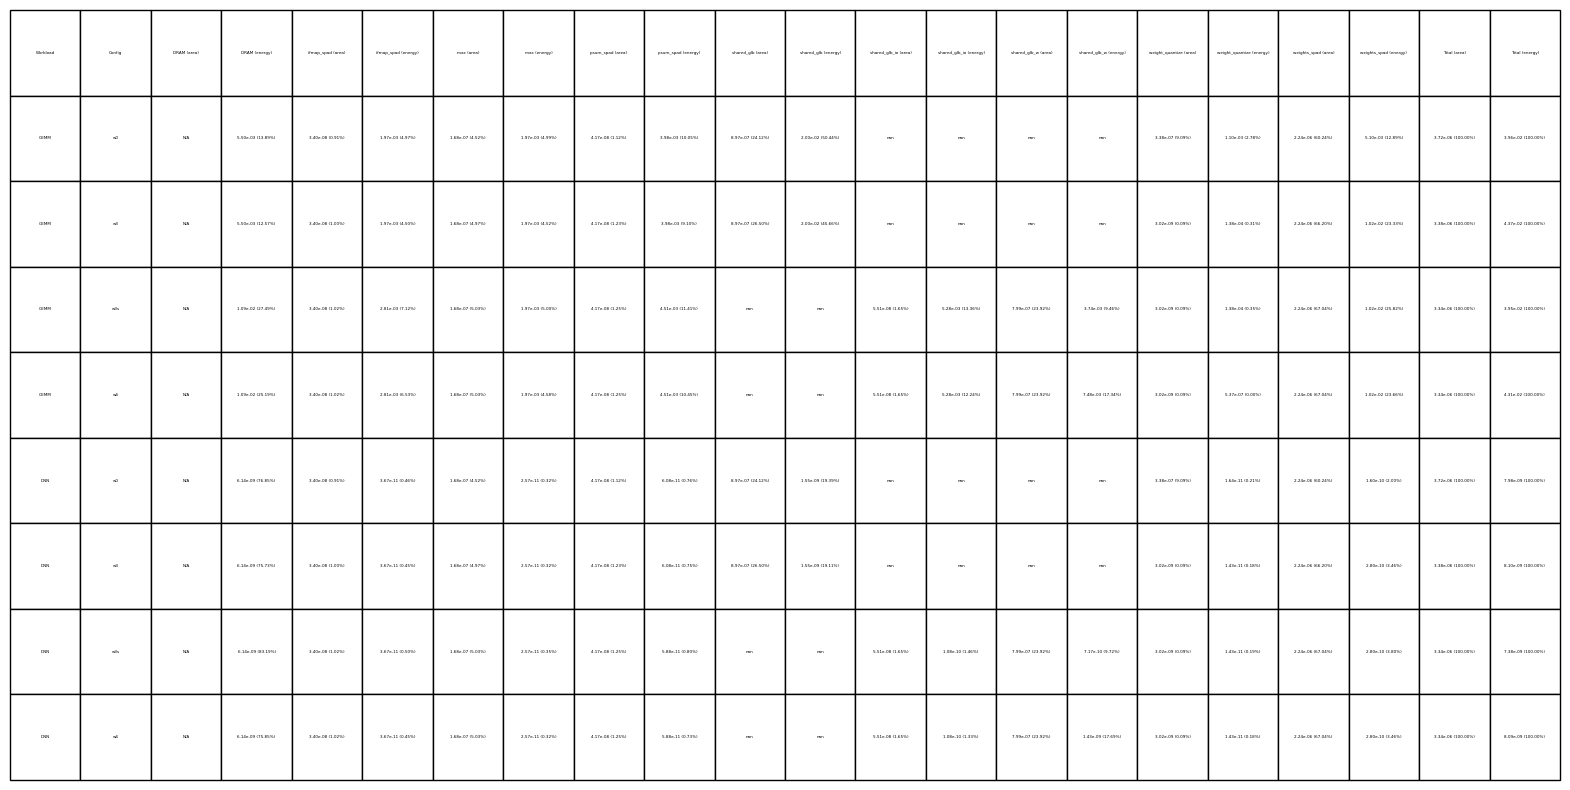

In [128]:
def create_formatted_table(gemm_results, full_dnn_results):
    # Create empty dataframe for the table
    rows = []
    
    # Process GEMM results
    for config, result in gemm_results.items():
        row = {'Workload': 'GEMM', 'Config': config}
        
        # Process area results
        for component, area in result.per_component_area.items():
            area_pct = area / result.area * 100
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
        row["Total (area)"] = f"{result.area:.2e} (100.00%)"
        
        # Process energy results
        for component, energy in result.per_component_energy.items():
            energy_pct = energy / result.energy * 100
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
        row["Total (energy)"] = f"{result.energy:.2e} (100.00%)"
        
        rows.append(row)
    
    # Process DNN results
    for config, result in full_dnn_results.items():
        row = {'Workload': 'DNN', 'Config': config}
        
        # Process area results
        for component, area in result.per_component_area.items():
            area_pct = area / result.area * 100
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
        row["Total (area)"] = f"{result.area:.2e} (100.00%)"
        
        # Process energy results
        for component, energy in result.per_component_energy.items():
            energy_pct = energy / result.energy * 100
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
        row["Total (energy)"] = f"{result.energy:.2e} (100.00%)"
        
        rows.append(row)
    
    # Create DataFrame
    df = pd.DataFrame(rows)
    
    # Get all components (for both area and energy)
    all_components = set()
    for row in rows:
        for key in row.keys():
            if '(' in key and key not in ['Workload', 'Config', 'Total (area)', 'Total (energy)']:
                component_name = key.split(' (')[0]
                all_components.add(component_name)
    
    # Reorder columns
    columns = ['Workload', 'Config']
    for component in sorted(list(all_components)):
        columns.extend([f"{component} (area)", f"{component} (energy)"])
    columns.extend(["Total (area)", "Total (energy)"])
    
    # Ensure all columns exist (some components might be missing in some results)
    for col in columns:
        if col not in df.columns:
            df[col] = 'N/A'
    
    # Final table with ordered columns
    return df[columns]

# Generate and display the table
results_table = create_formatted_table(gemm_results, full_dnn_results)
display(results_table)

# Save to CSV for further processing
results_table.to_csv('nestquant_results.csv', index=False)

# Save as PNG (using matplotlib as discussed earlier)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
table_plot = ax.table(
    cellText=results_table.values,
    colLabels=results_table.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Rotate column headers and adjust appearance
for (row, col), cell in table_plot.get_celld().items():
    if row == 0:  # Column headers
        cell.set_text_rotation(45)
        cell.set_height(0.15)
    cell.set_fontsize(9)

table_plot.auto_set_font_size(False)
table_plot.scale(1, 1.8)
plt.savefig('nestquant_results_table.png', bbox_inches='tight', dpi=300)
plt.close()

In [3]:
import os
import glob
from scripts.notebook_utils import run_test
from scripts import utils as utl

# Function to process the full DNN using run_test
def process_full_dnn(arch, dnn_name="resnet18"):
    # Get the proper path to the workload directory
    dnn_dir = utl.path_from_model_dir("workloads", dnn_name)
    
    # Get paths to all layer files in the directory
    layer_files = glob.glob(os.path.join(dnn_dir, "*.yaml"))
    
    if not layer_files:
        print(f"No layer files found in {dnn_dir}")
        return None
    
    print(f"Found {len(layer_files)} layer files in {dnn_dir}")
    
    # Initialize aggregated results
    total_energy = 0
    total_area = 0
    component_energy = {}
    component_area = {}
    
    # Process each layer
    for layer_file in sorted(layer_files):
        layer_name = os.path.basename(layer_file)
        print(f"Processing layer: {layer_name}")
        
        # Use run_test instead of calling the function directly
        result = run_test(
            "nestquant", 
            "test_area_energy_breakdown",
            False,  # don't show docs
            arch=arch, 
            layer=layer_file, 
            use_dnn=False
        )
        
        # Accumulate total energy and area
        total_energy += result.energy
        total_area = result.area  # Just use the area of the hardware
        
        # Accumulate per-component energy
        for component, energy in result.per_component_energy.items():
            if component in component_energy:
                component_energy[component] += energy
            else:
                component_energy[component] = energy
        
        # For area, just use the last layer's values
        component_area = result.per_component_area.copy()
    
    # Create a combined result object
    from scripts.tl_output_parsing import MacroOutputStats
    
    combined_result = MacroOutputStats()
    combined_result.energy = total_energy
    combined_result.area = total_area
    combined_result.per_component_energy = component_energy
    combined_result.per_component_area = component_area
    
    print(f"Total energy for {arch} on full DNN: {total_energy}")
    
    return combined_result

# Run tests for all architectures on the full DNN
archs = ["w0", "w3", "w3s", "w4"]
dnn_results_aggregate = {}

for arch in archs:
    print(f"\nTesting architecture {arch}...")
    dnn_results_aggregate[arch] = process_full_dnn(arch)


Testing architecture w0...
Found 21 layer files in /home/workspace/models/workloads/resnet18
Processing layer: 00.yaml
Running on layer /home/workspace/models/workloads/resnet18/00.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml
Processing layer: 01.yaml
Running on layer /home/workspace/models/workloads/resnet18/01.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml
Processing layer: 02.yaml
Running on layer /home/workspace/models/workloads/resnet18/02.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml
Processing layer: 03.yaml
Running on layer /home/workspace/models/workloads/resnet18/03.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w0.yaml
Error processing spec with nestquant, None, /home/workspace/models/workloads/resnet18/03.yaml, {}


RuntimeError: 

========================================================================================================================
Timeloop mapper failed with return code -2. Please check the output files in /home/workspace/scripts/../outputs/266.140737476156288 for more information. To debug, you can edit the file:
	/home/workspace/scripts/../outputs/266.140737476156288/parsed-processed-input.yaml
and run 
	tl mapper /home/workspace/scripts/../outputs/266.140737476156288/parsed-processed-input.yaml
to see the error. If you're running the mapper and Timeloop can't find a vaild mapping, try setting 'diagnostics: true' in the mapper input specification.

In [20]:
import os
import glob
from joblib import delayed
from scripts.notebook_utils import run_test
from scripts import utils as utl

# Function to process the full DNN in parallel
def process_full_dnn_parallel(arch, dnn_name="resnet18", n_jobs=8):
    # Get the proper path to the workload directory
    dnn_dir = utl.path_from_model_dir("workloads", dnn_name)
    
    # Get paths to all layer files in the directory
    layer_files = sorted(glob.glob(os.path.join(dnn_dir, "*.yaml")))
    
    if not layer_files:
        print(f"No layer files found in {dnn_dir}")
        return None
    
    print(f"Found {len(layer_files)} layer files in {dnn_dir}")
    
    # Create delayed function calls for each layer
    delayed_calls = []
    for layer_file in layer_files:
        delayed_calls.append(
            delayed(run_test)(
                "nestquant", 
                "test_area_energy_breakdown",
                False,  # don't show docs
                arch=arch, 
                layer=layer_file, 
                use_dnn=False
            )
        )
    
    # Run all the calls in parallel
    results = utl.parallel_test(delayed_calls, n_jobs=n_jobs)
    
    # # Aggregate the results
    # total_energy = 0
    # # Use the area from the last result
    # total_area = results[-1].area if results else 0
    # component_energy = {}
    # component_area = {}
    
    # # Accumulate results
    # for result in results:
    #     # Add energy
    #     total_energy += result.energy
        
    #     # Sum component energy
    #     for component, energy in result.per_component_energy.items():
    #         if component in component_energy:
    #             component_energy[component] += energy
    #         else:
    #             component_energy[component] = energy
    
    # # For area, just use the last result
    # if results:
    #     component_area = results[-1].per_component_area.copy()
    
    # # Create a combined result object
    # from scripts.tl_output_parsing import MacroOutputStats
    
    # combined_result = MacroOutputStats()
    # combined_result.energy = total_energy
    # combined_result.area = total_area
    # combined_result.per_component_energy = component_energy
    # combined_result.per_component_area = component_area
    
    # print(f"Total energy for {arch} on full DNN: {total_energy}")
    
    return results

# Run tests for all architectures on the full DNN


In [24]:
archs2 = ["w3s", "w4"]
dnn_results_parallel2 = {}

for arch in archs2:
    print(f"\nTesting architecture {arch}...")
    dnn_results_parallel2[arch] = process_full_dnn_parallel(arch, n_jobs=6)  # Adjust n_jobs as needed


Testing architecture w3s...
Found 21 layer files in /home/workspace/models/workloads/resnet18


100%|██████████| 21/21 [26:12<00:00, 74.88s/it]  



Testing architecture w4...
Found 21 layer files in /home/workspace/models/workloads/resnet18


 67%|██████▋   | 14/21 [27:31<11:42, 100.29s/it] 

Running on layer /home/workspace/models/workloads/resnet18/02.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/08.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/15.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/02.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml
Running on layer /home/workspace/models/workloads/resnet18/09.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml
Running on layer /home/workspace/models/workloads/resnet18/16.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml
Running on layer /home/workspace/models/workloads/resnet18/01.yaml
Architecture

100%|██████████| 21/21 [27:52<00:00, 79.65s/it] 


Running on layer /home/workspace/models/workloads/resnet18/03.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/07.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/11.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/18.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3s.yaml
Running on layer /home/workspace/models/workloads/resnet18/01.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml
Running on layer /home/workspace/models/workloads/resnet18/07.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml
Running on layer /home/workspace/models/workloads/resnet18/11.yaml
Architectur

In [34]:

# Aggregate the results
for arch, results in dnn_results_parallel1.items():
    total_energy = 0
    # Use the area from the last result
    # print(layer_results_list[-1].area)
    total_area = results[-1].area if results else 0
    component_energy = {}
    component_area = {}
    
    # Accumulate results
    for result in results:
        # Add energy
        total_energy += result.energy
        
        # Sum component energy
        for component, energy in result.per_component_energy.items():
            if component in component_energy:
                component_energy[component] += energy
            else:
                component_energy[component] = energy
    
    # For area, just use the last result
    if results:
        component_area = results[-1].per_component_area.copy()
    
    # Create a combined result object
    
    print(f"Total energy for {arch} on full DNN: {total_energy}")

Total energy for w0 on full DNN: 0.007461803609030656
Total energy for w3 on full DNN: 0.008250774182627901


In [10]:
archs = ["w0", "w3"]
dnn_results_parallel1 = {}

for arch in archs:
    print(f"\nTesting architecture {arch}...")
    dnn_results_parallel1[arch] = process_full_dnn_parallel(arch, n_jobs=4)  # Adjust n_jobs as needed

{'w0': [<tl_output_parsing.MacroOutputStats at 0x7fffd29655d0>,
 'w3': [<tl_output_parsing.MacroOutputStats at 0x7fffd2d9aa40>,
 'w3s': [<tl_output_parsing.MacroOutputStats at 0x7fffd2965f90>,
 'w4': [<tl_output_parsing.MacroOutputStats at 0x7fffa43bc2b0>,
  <tl_output_parsing.MacroOutputStats at 0x7fffd2d9a860>]}

Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w3.yaml
Running on layer /home/workspace/models/workloads/llm/gemm.yaml
Architecture is taken from /home/workspace/models/arch/1_macro/nestquant/arch_w4.yaml


In [49]:
import pandas as pd

# Assuming you have processed the results for both sets:
# dnn_results_parallel1, dnn_results_parallel2

# Create a function to convert the aggregated results to a table format
def create_table_from_results(results_dict):
    rows = []
    
    for arch, results_list in results_dict.items():
        # First, aggregate the results for this architecture
        total_energy = 0
        total_area = results_list[-1].area if results_list else 0
        component_energy = {}
        component_area = {}
        
        # Accumulate results
        for result in results_list:
            # Add energy
            total_energy += result.energy
            
            # Sum component energy
            for component, energy in result.per_component_energy.items():
                if component in component_energy:
                    component_energy[component] += energy
                else:
                    component_energy[component] = energy
        
        # For area, just use the last result
        if results_list:
            component_area = results_list[-1].per_component_area.copy()
        
        # Now create a row for this architecture
        row = {'Workload': 'DNN', 'Config': arch}
        
        # Add all component area and energy values with percentages
        for component, area in component_area.items():
            area_pct = (area / total_area * 100) if total_area > 0 else 0
            row[f"{component} (area)"] = f"{area:.2e} ({area_pct:.2f}%)"
            
        for component, energy in component_energy.items():
            energy_pct = (energy / total_energy * 100) if total_energy > 0 else 0
            row[f"{component} (energy)"] = f"{energy:.2e} ({energy_pct:.2f}%)"
            
        # Add totals
        row["Total (area)"] = f"{total_area:.2e} (100.00%)"
        row["Total (energy)"] = f"{total_energy:.2e} (100.00%)"
        
        rows.append(row)
    
    # Create DataFrame
    return pd.DataFrame(rows)

# Create tables for each set of results
dnn_table1 = create_table_from_results(dnn_results_parallel1)
dnn_table2 = create_table_from_results(dnn_results_parallel2)

# Combine tables if needed
final_dnn_table = pd.concat([dnn_table1, dnn_table2])

# Display the table
display(final_dnn_table)

# Save to CSV
final_dnn_table.to_csv('nestquant_dnn_results.csv', index=False)

# You can also create a combined table with GEMM and DNN results if you've already created the GEMM table
# Assuming gemm_table exists:
# combined_table = pd.concat([table2, final_dnn_table])
# combined_table.to_csv('nestquant_combined_results.csv', index=False)

,Workload,Config,weights_spad (area),weight_quantize (area),mac (area),shared_glb (area),ifmap_spad (area),psum_spad (area),mac (energy),weight_quantize (energy),...,weights_spad (energy),ifmap_spad (energy),shared_glb (energy),DRAM (energy),Total (area),Total (energy),shared_glb_w (area),shared_glb_io (area),shared_glb_io (energy),shared_glb_w (energy)
0,DNN,w0,2.24e-06 (60.24%),3.38e-07 (9.09%),1.68e-07 (4.52%),8.97e-07 (24.12%),3.40e-08 (0.91%),4.17e-08 (1.12%),4.17e-04 (5.59%),2.32e-04 (3.11%),...,1.07e-03 (14.31%),3.54e-04 (4.74%),3.22e-03 (43.14%),1.35e-03 (18.13%),3.72e-06 (100.00%),7.46e-03 (100.00%),NaN,NaN,NaN,NaN
1,DNN,w3,2.24e-06 (66.20%),3.02e-09 (0.09%),1.68e-07 (4.97%),8.97e-07 (26.50%),3.40e-08 (1.00%),4.17e-08 (1.23%),4.17e-04 (5.05%),2.74e-05 (0.33%),...,2.14e-03 (25.89%),3.45e-04 (4.18%),3.16e-03 (38.33%),1.34e-03 (16.29%),3.38e-06 (100.00%),8.25e-03 (100.00%),NaN,NaN,NaN,NaN
0,DNN,w3s,2.24e-06 (67.04%),3.02e-09 (0.09%),1.68e-07 (5.03%),NaN,3.40e-08 (1.02%),4.17e-08 (1.25%),4.17e-04 (3.96%),5.62e-05 (0.53%),...,2.47e-03 (23.50%),4.37e-04 (4.15%),NaN,3.19e-03 (30.27%),3.34e-06 (100.00%),1.05e-02 (100.00%),7.99e-07 (23.92%),5.51e-08 (1.65%),1.41e-03 (13.40%),1.56e-03 (14.84%)
1,DNN,w4,2.24e-06 (67.04%),3.02e-09 (0.09%),1.68e-07 (5.03%),NaN,3.40e-08 (1.02%),4.17e-08 (1.25%),4.17e-04 (3.73%),1.72e-06 (0.02%),...,2.40e-03 (21.45%),4.37e-04 (3.91%),NaN,3.06e-03 (27.41%),3.34e-06 (100.00%),1.12e-02 (100.00%),7.99e-07 (23.92%),5.51e-08 (1.65%),1.10e-03 (9.84%),2.77e-03 (24.78%)


In [51]:
import pandas as pd

# Load both CSV files
original_results = pd.read_csv("nestquant_results.csv")
new_dnn_results = pd.read_csv("nestquant_dnn_results.csv")

# Remove existing DNN rows from the original results
original_results = original_results[original_results['Workload'] != 'DNN']

# Concatenate the original results (without DNN) with the new DNN results
combined_results = pd.concat([original_results, new_dnn_results], ignore_index=True)

# Ensure the column order matches the original file
original_columns = original_results.columns.tolist()
missing_columns = [col for col in new_dnn_results.columns if col not in original_columns]

if missing_columns:
    # If there are new columns in the DNN results, add them to the combined results
    combined_results = combined_results.reindex(columns=original_columns + missing_columns)

# Save the updated results
combined_results.to_csv("nestquant_results_updated1.csv", index=False)

print("Updated results saved to nestquant_results_updated.csv")

Updated results saved to nestquant_results_updated.csv


In [54]:
import pandas as pd
# from IPython.display import display

# Load the updated CSV file
results_df = pd.read_csv("nestquant_results_updated1.csv")

# Apply styling to the DataFrame
styled_df = results_df.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid gray',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f9f9f9')]}
])

# Display the styled DataFrame
display(styled_df)

# To save the styled table as HTML if needed
# styled_df.to_html('workspace/models/arch/1_macro/nestquant/nestquant_results_styled.html')

,Workload,Config,DRAM (area),DRAM (energy),ifmap_spad (area),ifmap_spad (energy),mac (area),mac (energy),psum_spad (area),psum_spad (energy),shared_glb (area),shared_glb (energy),shared_glb_io (area),shared_glb_io (energy),shared_glb_w (area),shared_glb_w (energy),weight_quantize (area),weight_quantize (energy),weights_spad (area),weights_spad (energy),Total (area),Total (energy)
0,GEMM,w0,nan,5.50e-03 (13.89%),3.40e-08 (0.91%),1.97e-03 (4.97%),1.68e-07 (4.52%),1.97e-03 (4.99%),4.17e-08 (1.12%),3.98e-03 (10.05%),8.97e-07 (24.12%),2.00e-02 (50.44%),nan,nan,nan,nan,3.38e-07 (9.09%),1.10e-03 (2.78%),2.24e-06 (60.24%),5.10e-03 (12.89%),3.72e-06 (100.00%),3.96e-02 (100.00%)
1,GEMM,w3,nan,5.50e-03 (12.57%),3.40e-08 (1.00%),1.97e-03 (4.50%),1.68e-07 (4.97%),1.97e-03 (4.52%),4.17e-08 (1.23%),3.98e-03 (9.10%),8.97e-07 (26.50%),2.00e-02 (45.66%),nan,nan,nan,nan,3.02e-09 (0.09%),1.38e-04 (0.31%),2.24e-06 (66.20%),1.02e-02 (23.33%),3.38e-06 (100.00%),4.37e-02 (100.00%)
2,GEMM,w3s,nan,1.09e-02 (27.49%),3.40e-08 (1.02%),2.81e-03 (7.12%),1.68e-07 (5.03%),1.97e-03 (5.00%),4.17e-08 (1.25%),4.51e-03 (11.41%),nan,nan,5.51e-08 (1.65%),5.28e-03 (13.36%),7.99e-07 (23.92%),3.74e-03 (9.46%),3.02e-09 (0.09%),1.38e-04 (0.35%),2.24e-06 (67.04%),1.02e-02 (25.82%),3.34e-06 (100.00%),3.95e-02 (100.00%)
3,GEMM,w4,nan,1.09e-02 (25.19%),3.40e-08 (1.02%),2.81e-03 (6.53%),1.68e-07 (5.03%),1.97e-03 (4.58%),4.17e-08 (1.25%),4.51e-03 (10.45%),nan,nan,5.51e-08 (1.65%),5.28e-03 (12.24%),7.99e-07 (23.92%),7.48e-03 (17.34%),3.02e-09 (0.09%),5.37e-07 (0.00%),2.24e-06 (67.04%),1.02e-02 (23.66%),3.34e-06 (100.00%),4.31e-02 (100.00%)
4,DNN,w0,nan,1.35e-03 (18.13%),3.40e-08 (0.91%),3.54e-04 (4.74%),1.68e-07 (4.52%),4.17e-04 (5.59%),4.17e-08 (1.12%),8.19e-04 (10.98%),8.97e-07 (24.12%),3.22e-03 (43.14%),nan,nan,nan,nan,3.38e-07 (9.09%),2.32e-04 (3.11%),2.24e-06 (60.24%),1.07e-03 (14.31%),3.72e-06 (100.00%),7.46e-03 (100.00%)
5,DNN,w3,nan,1.34e-03 (16.29%),3.40e-08 (1.00%),3.45e-04 (4.18%),1.68e-07 (4.97%),4.17e-04 (5.05%),4.17e-08 (1.23%),8.19e-04 (9.93%),8.97e-07 (26.50%),3.16e-03 (38.33%),nan,nan,nan,nan,3.02e-09 (0.09%),2.74e-05 (0.33%),2.24e-06 (66.20%),2.14e-03 (25.89%),3.38e-06 (100.00%),8.25e-03 (100.00%)
6,DNN,w3s,nan,3.19e-03 (30.27%),3.40e-08 (1.02%),4.37e-04 (4.15%),1.68e-07 (5.03%),4.17e-04 (3.96%),4.17e-08 (1.25%),9.84e-04 (9.35%),nan,nan,5.51e-08 (1.65%),1.41e-03 (13.40%),7.99e-07 (23.92%),1.56e-03 (14.84%),3.02e-09 (0.09%),5.62e-05 (0.53%),2.24e-06 (67.04%),2.47e-03 (23.50%),3.34e-06 (100.00%),1.05e-02 (100.00%)
7,DNN,w4,nan,3.06e-03 (27.41%),3.40e-08 (1.02%),4.37e-04 (3.91%),1.68e-07 (5.03%),4.17e-04 (3.73%),4.17e-08 (1.25%),9.91e-04 (8.87%),nan,nan,5.51e-08 (1.65%),1.10e-03 (9.84%),7.99e-07 (23.92%),2.77e-03 (24.78%),3.02e-09 (0.09%),1.72e-06 (0.02%),2.24e-06 (67.04%),2.40e-03 (21.45%),3.34e-06 (100.00%),1.12e-02 (100.00%)


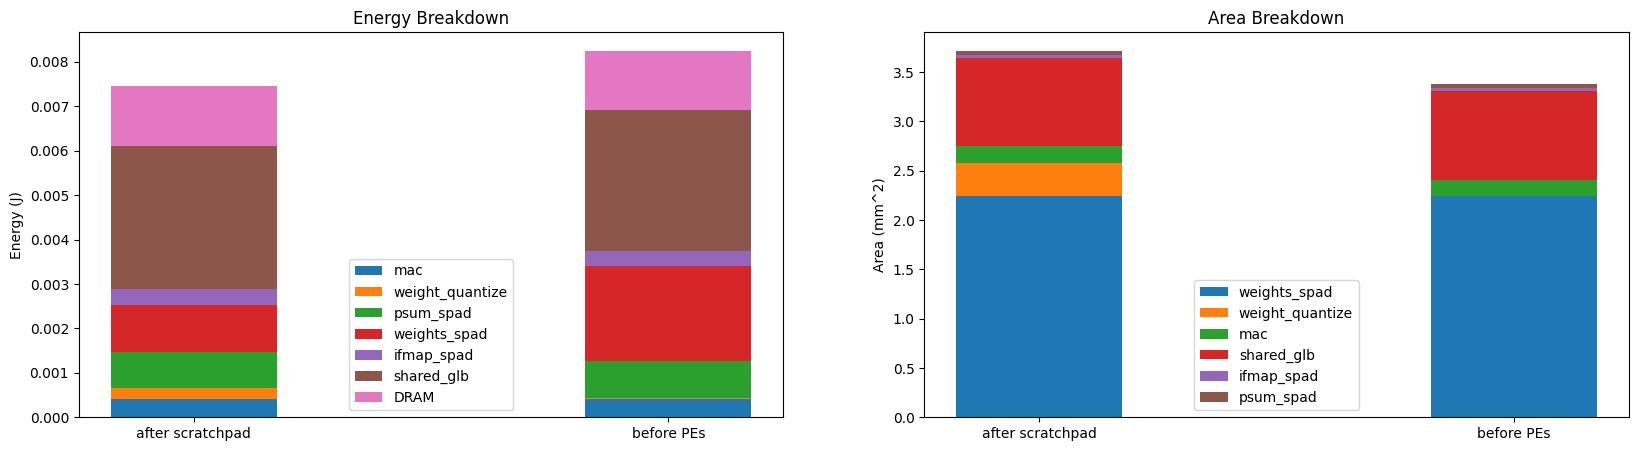

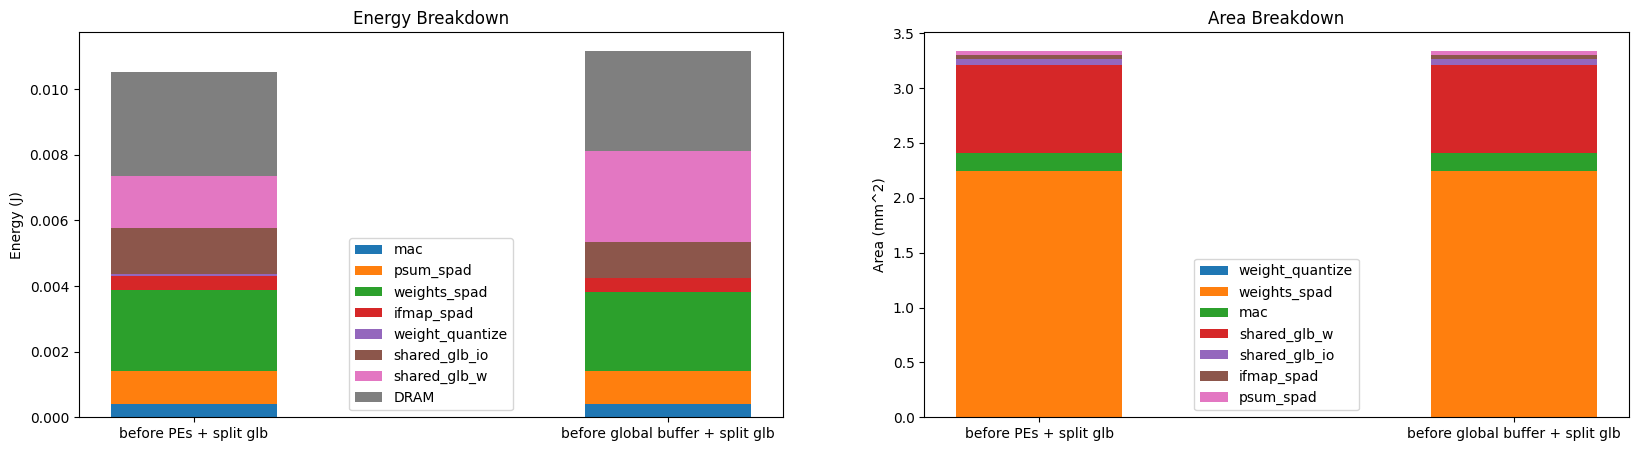

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Create a function to aggregate the component energy/area from multiple layers
def aggregate_component_values(results_list, attribute_name):
    if not results_list or len(results_list) == 0:
        return {}
    
    if attribute_name == 'per_component_energy':
        # For energy, sum across all layers
        aggregated = {}
        for result in results_list:
            for component, value in getattr(result, attribute_name).items():
                if component in aggregated:
                    aggregated[component] += value
                else:
                    aggregated[component] = value
        return aggregated
    else:  # per_component_area
        # For area, just use the last layer's values
        return getattr(results_list[-1], attribute_name).copy()

# Now create the plots with aggregated data
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Aggregate energy data for the plot
energy_w0 = aggregate_component_values(dnn_results_parallel1["w0"], 'per_component_energy')
energy_w3 = aggregate_component_values(dnn_results_parallel1["w3"], 'per_component_energy')

# Aggregate area data for the plot
area_w0 = aggregate_component_values(dnn_results_parallel1["w0"], 'per_component_area')
area_w3 = aggregate_component_values(dnn_results_parallel1["w3"], 'per_component_area')

# Create plots
bar_stacked(
    {"after scratchpad": energy_w0,
     "before PEs": energy_w3},
    ylabel="Energy (J)",
    title=f"Energy Breakdown",
    ax=axs[0]
)

bar_stacked(
    {"after scratchpad": {k: v * 1e6 for k, v in area_w0.items()},
     "before PEs": {k: v * 1e6 for k, v in area_w3.items()}},
    ylabel="Area (mm^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)

for ax in axs:
    ax.tick_params(axis='x', labelrotation=0)

plt.savefig("figures/w03.pdf")

# If you want to do the same for dnn_results_parallel2:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Aggregate energy data for the second plot
energy_w3s = aggregate_component_values(dnn_results_parallel2["w3s"], 'per_component_energy')
energy_w4 = aggregate_component_values(dnn_results_parallel2["w4"], 'per_component_energy')

# Aggregate area data for the second plot
area_w3s = aggregate_component_values(dnn_results_parallel2["w3s"], 'per_component_area')
area_w4 = aggregate_component_values(dnn_results_parallel2["w4"], 'per_component_area')

# Create plots for second comparison
bar_stacked(
    {"before PEs + split glb": energy_w3s,
     "before global buffer + split glb": energy_w4},
    ylabel="Energy (J)",
    title=f"Energy Breakdown",
    ax=axs[0]
)

bar_stacked(
    {"before PEs + split glb": {k: v * 1e6 for k, v in area_w3s.items()},
     "before global buffer + split glb": {k: v * 1e6 for k, v in area_w4.items()}},
    ylabel="Area (mm^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)

for ax in axs:
    ax.tick_params(axis='x', labelrotation=0)

plt.savefig("figures/w34s.pdf")

In [38]:
# Get all unique components across all rows
all_components = set()
for row in final_dnn_table.to_dict('records'):
    for key in row.keys():
        if '(' in key and key not in ['Workload', 'Config', 'Total (area)', 'Total (energy)']:
            component_name = key.split(' (')[0]
            all_components.add(component_name)

# Create ordered columns
columns = ['Workload', 'Config']
for component in sorted(list(all_components)):
    columns.extend([f"{component} (area)", f"{component} (energy)"])
columns.extend(["Total (area)", "Total (energy)"])

# Ensure all columns exist
for col in columns:
    if col not in final_dnn_table.columns:
        final_dnn_table[col] = 'N/A'

# Final table with ordered columns
final_dnn_table = final_dnn_table[columns]

# Save the properly formatted table
final_dnn_table.to_csv('nestquant_dnn_results_formatted.csv', index=False)

